<a href="https://colab.research.google.com/github/Ultan-Kearns/LYIT-Machine-Learning-Project/blob/main/UpdatedFinalSubmissionNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading files and importing libraries

In [66]:
#import libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib 
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error, r2_score,silhouette_score
import seaborn as sns # for the correlation matrix plot
import pydot
import pydotplus
import io
import cv2
from google.colab import files
from tabulate import tabulate
from sklearn.linear_model import LinearRegression
from math import sqrt
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler  
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from IPython.display import Image
from six import StringIO
from sklearn.decomposition import PCA
# installed extra package to import researchpy using pip - small file not much impact 15kb
!pip install researchpy 
import researchpy
uploaded = files.upload()
wdbcwh = pd.read_csv(io.BytesIO(uploaded['wdbcwh.csv']), header = 0)

Saving wdbcwh.csv to wdbcwh (4).csv


# Prepping and analyzing the data
In this section we prep and analyze the data we do this by dividing the data into two groups training and testing.  We will train the models with the training data so that we can predict the values within the testing dataset.  We randomize the data to produce a more accurate model and to show us the variation in performance of our models as the data is different everytime. We could also use a random seed to produce the same "random" set of rows everytime, although we wanted to avoid this to reduce our models bias towards the data when training and testing our models.

In [67]:
# split data into training and test datasets
features = list(wdbcwh.columns[2:32])

X = wdbcwh[features]
y = wdbcwh['Diagnosis']
# could use random state 42 for same results every time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Creating training / test set for unsupervised algorithms


In [68]:
X_train

,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,Mean_Symmetry,Mean_Fractal_Dimension,Radius_SE,Texture_SE,Perimeter_SE,Area_SE,Smoothness_SE,Compactness_SE,Concavity_SE,Concave_Points_SE,Symmetry_SE,Fractal_Dimension_SE,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_Dimension
164,23.27,22.04,152.10,1686.0,0.08439,0.11450,0.132400,0.097020,0.1801,0.05553,0.6642,0.8561,4.6030,97.85,0.004910,0.025440,0.028220,0.016230,0.019560,0.003740,28.01,28.22,184.20,2403.0,0.12280,0.35830,0.394800,0.23460,0.3589,0.09187
209,15.27,12.91,98.17,725.5,0.08182,0.06230,0.058920,0.031570,0.1359,0.05526,0.2134,0.3628,1.5250,20.00,0.004291,0.012360,0.018410,0.007373,0.009539,0.001656,17.38,15.92,113.70,932.7,0.12220,0.21860,0.296200,0.10350,0.2320,0.07474
58,13.05,19.31,82.61,527.2,0.08060,0.03789,0.000692,0.004167,0.1819,0.05501,0.4040,1.2140,2.5950,32.96,0.007491,0.008593,0.000692,0.004167,0.021900,0.002990,14.23,22.25,90.24,624.1,0.10210,0.06191,0.001845,0.01111,0.2439,0.06289
379,11.08,18.83,73.30,361.6,0.12160,0.21540,0.168900,0.063670,0.2196,0.07950,0.2114,1.0270,1.7190,13.99,0.007405,0.045490,0.045880,0.013390,0.017380,0.004435,13.24,32.82,91.76,508.1,0.21840,0.93790,0.840200,0.25240,0.4154,0.14030
40,13.44,21.58,86.18,563.0,0.08162,0.06031,0.031100,0.020310,0.1784,0.05587,0.2385,0.8265,1.5720,20.53,0.003280,0.011020,0.013900,0.006881,0.013800,0.001286,15.93,30.25,102.50,787.9,0.10940,0.20430,0.208500,0.11120,0.2994,0.07146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,11.75,17.56,75.89,422.9,0.10730,0.09713,0.052820,0.044400,0.1598,0.06677,0.4384,1.9070,3.1490,30.66,0.006587,0.018150,0.017370,0.013160,0.018350,0.002318,13.50,27.98,88.52,552.3,0.13490,0.18540,0.136600,0.10100,0.2478,0.07757
238,14.22,27.85,92.55,623.9,0.08223,0.10390,0.110300,0.044080,0.1342,0.06129,0.3354,2.3240,2.1050,29.96,0.006307,0.028450,0.038500,0.010110,0.011850,0.003589,15.75,40.54,102.50,764.0,0.10810,0.24260,0.306400,0.08219,0.1890,0.07796
270,14.29,16.82,90.30,632.6,0.06429,0.02675,0.007250,0.006250,0.1508,0.05376,0.1302,0.7198,0.8439,10.77,0.003492,0.003710,0.004826,0.003608,0.015360,0.001381,14.91,20.65,94.44,684.6,0.08567,0.05036,0.038660,0.03333,0.2458,0.06120
409,12.27,17.92,78.41,466.1,0.08685,0.06526,0.032110,0.026530,0.1966,0.05597,0.3342,1.7810,2.0790,25.79,0.005888,0.023100,0.020590,0.010750,0.025780,0.002267,14.10,28.88,89.00,610.2,0.12400,0.17950,0.137700,0.09532,0.3455,0.06896


Here we are showing some of the values in our training sets and our test sets, by doing this we can see that we have a decent amount of randomness in our data

In [69]:
print('X_train ',X_train)
print('y_train ',y_train)
print('X_test ',X_test)
print('y_test ',y_test)

X_train       Mean_Radius  Mean_Texture  ...  Worst_Symmetry  Worst_Fractal_Dimension
164        23.27         22.04  ...          0.3589                  0.09187
209        15.27         12.91  ...          0.2320                  0.07474
58         13.05         19.31  ...          0.2439                  0.06289
379        11.08         18.83  ...          0.4154                  0.14030
40         13.44         21.58  ...          0.2994                  0.07146
..           ...           ...  ...             ...                      ...
530        11.75         17.56  ...          0.2478                  0.07757
238        14.22         27.85  ...          0.1890                  0.07796
270        14.29         16.82  ...          0.2458                  0.06120
409        12.27         17.92  ...          0.3455                  0.06896
44         13.17         21.81  ...          0.3693                  0.09618

[398 rows x 30 columns]
y_train  164    M
209    B
58     B
379   

We show the shape of our test and training sets here, when using different split values we will get differing results.  It is important to know the shape of our sets as we can reshape them if needed to fit our models

In [70]:
# print test sets shape will be same as training sets shape
print('X_test set shape: ',X_test.shape)
print('y_test set shape: ',y_test.shape)
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)

X_test set shape:  (171, 30)
y_test set shape:  (171,)
X_train shape:  (398, 30)
y_train shape:  (398,)


Here we are replacing diagnosis values with a 1 for malignant and a 0 for benign, we do this because it makes it easier to perform numerical calculations on the sets. 

In [71]:
# Disabled pandas warning due to false positive
pd.options.mode.chained_assignment = None  # default='warn'


# Replace malignant with 1 and benign with 0
y_train = y_train.replace({'M':1,'B':0})
y_test = y_test.replace({'M':1,'B':0})
y = y.replace({'M':1,'B':0})
# resetting pandas warning
pd.options.mode.chained_assignment = 'warn'  # default='warn'


Creating tables of data for comparing results

In [72]:
# created results table for comparing results
#resultdatatable= [['Method Description','Accuracy']]
resultdatatable=[]
#print(tabulate(resultdatatable, headers='firstrow'))

## Show standard deviation and variance between sets

Here we are showing both the standard deviation and variance of the sets, these are good methods for detecting outliers in our set, as we can see both sets have a somewhat high level of standard deviation.  We may try dropping columns from our dataframe to try and reduce this.  We can also see from these variables the amount of variation in certain features or throughout the overall dataset, these are useful metrics when training the models as we can ensure the models are trained with a large variety of different values.

Standard deviation is calculated by calculating the sum of each element in our data set then subtracting the population mean from the element and squaring we then divide by n and get the square root

Variance is calculated by essentially the same way but without getting the square root of our end result

In [73]:
print('Standard deviation of values in x training set ',X_train.std())
print('Variance of diagnosis values in x training set: ', X_train.var())

Standard deviation of values in x training set  Mean_Radius                  3.427041
Mean_Texture                 4.298458
Mean_Perimeter              23.585825
Mean_Area                  339.586730
Mean_Smoothness              0.013792
Mean_Compactness             0.051729
Mean_Concavity               0.075159
Mean_Concave_Points          0.037750
Mean_Symmetry                0.027833
Mean_Fractal_Dimension       0.007041
Radius_SE                    0.260166
Texture_SE                   0.558128
Perimeter_SE                 1.869881
Area_SE                     43.080276
Smoothness_SE                0.003039
Compactness_SE               0.018050
Concavity_SE                 0.024089
Concave_Points_SE            0.006060
Symmetry_SE                  0.008401
Fractal_Dimension_SE         0.002600
Worst_Radius                 4.751339
Worst_Texture                6.062801
Worst_Perimeter             32.840847
Worst_Area                 562.907169
Worst_Smoothness             0.022745
Wo

In [74]:

print('Standard deviation of values in y training set ',y_train.std())
print('Variance of values in y training set: ', y_train.var())

Standard deviation of values in y training set  0.48184512817086084
Variance of values in y training set:  0.2321747275419933


In [75]:
print('Standard deviation of values in x testing set ',X_test.std())
print('Variance of values in x testing set: ', X_test.var())


Standard deviation of values in x testing set  Mean_Radius                  3.750478
Mean_Texture                 4.312933
Mean_Perimeter              25.952390
Mean_Area                  380.045088
Mean_Smoothness              0.014665
Mean_Compactness             0.055218
Mean_Concavity               0.089380
Mean_Concave_Points          0.041205
Mean_Symmetry                0.026467
Mean_Fractal_Dimension       0.007111
Radius_SE                    0.314420
Texture_SE                   0.536707
Perimeter_SE                 2.340689
Area_SE                     50.792570
Smoothness_SE                0.002921
Compactness_SE               0.017609
Concavity_SE                 0.040992
Concave_Points_SE            0.006432
Symmetry_SE                  0.007969
Fractal_Dimension_SE         0.002758
Worst_Radius                 5.032845
Worst_Texture                6.333662
Worst_Perimeter             35.405618
Worst_Area                 585.771812
Worst_Smoothness             0.023023
Wor

In [76]:
print('Standard deviation of values in y testing set ',y_test.std())
print('Variance of values in y testing set: ', y_test.var())

Standard deviation of values in y testing set  0.4895888912360454
Variance of values in y testing set:  0.2396972824217403


Lets look at a histogram of diagnosis values in both our training and test sets to get a visualized view of our sets

(array([[28.,  0.,  0., ...,  0.,  0.,  0.],
        [28.,  1.,  1., ...,  0.,  0.,  0.],
        [28.,  2.,  0., ...,  0.,  0.,  0.],
        ...,
        [28.,  2.,  0., ...,  0.,  0.,  0.],
        [28.,  2.,  0., ...,  0.,  0.,  0.],
        [28.,  2.,  0., ...,  0.,  0.,  0.]]),
 array([   0. ,  425.4,  850.8, 1276.2, 1701.6, 2127. , 2552.4, 2977.8,
        3403.2, 3828.6, 4254. ]),
 <a list of 398 Lists of Patches objects>)

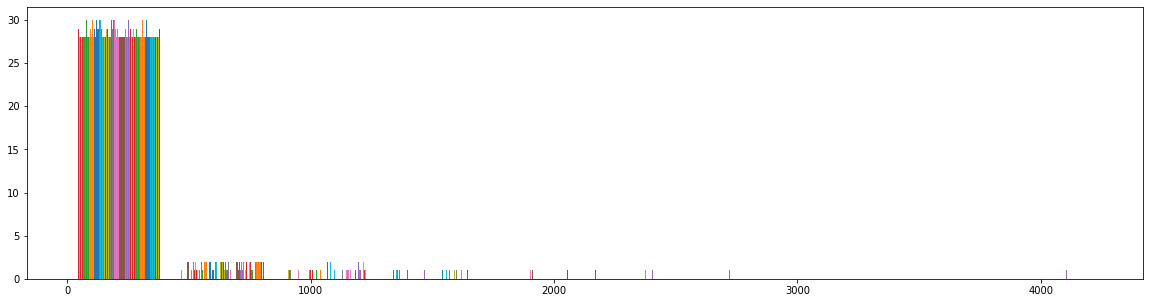

In [77]:
plt.hist(X_train)


(array([[28.,  1.,  1., ...,  0.,  0.,  0.],
        [30.,  0.,  0., ...,  0.,  0.,  0.],
        [28.,  1.,  1., ...,  0.,  0.,  0.],
        ...,
        [28.,  1.,  1., ...,  0.,  0.,  0.],
        [29.,  1.,  0., ...,  0.,  0.,  0.],
        [28.,  0.,  0., ...,  0.,  0.,  0.]]),
 array([   0. ,  323.4,  646.8,  970.2, 1293.6, 1617. , 1940.4, 2263.8,
        2587.2, 2910.6, 3234. ]),
 <a list of 171 Lists of Patches objects>)

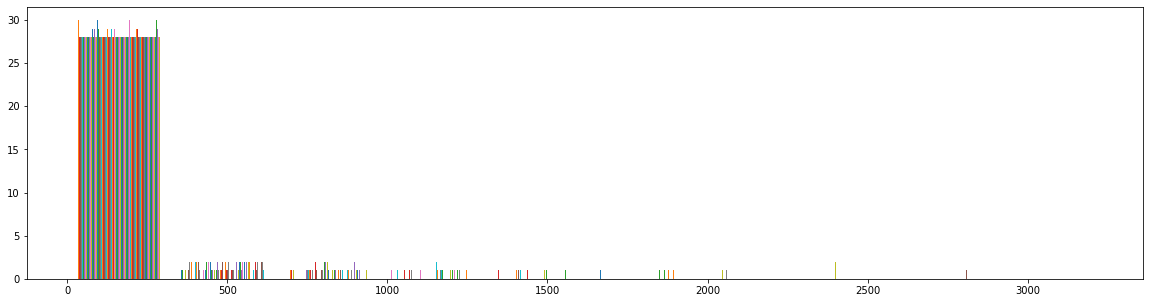

In [78]:
plt.hist(X_test)


(array([253.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 145.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

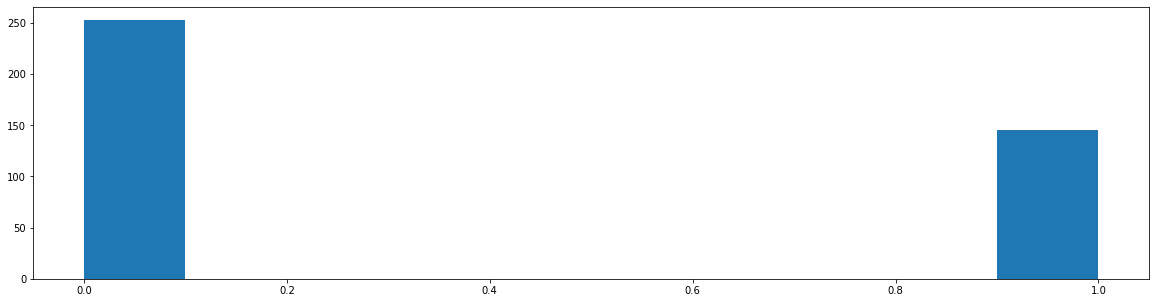

In [79]:
plt.hist(y_train)


(array([104.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  67.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

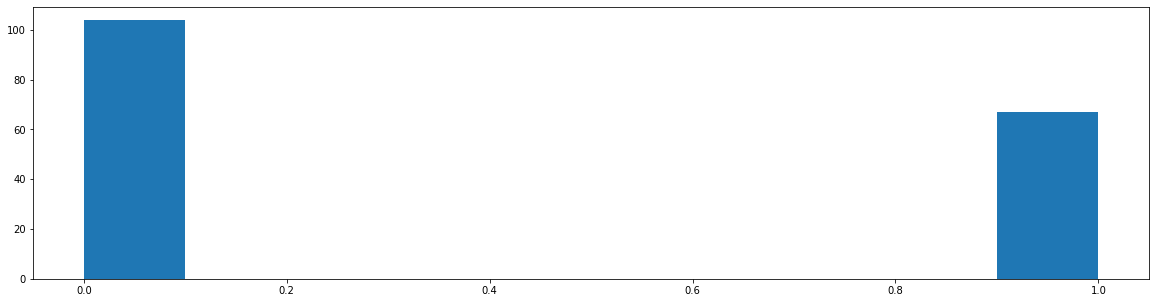

In [80]:
plt.hist(y_test)


## Show correlation
Here we are showing the correlation between each feature within the dataset.  Correlation is determined by analyzing the values of different features and comparing them with each other.  A 1 means that the values of the feature match exactly a value of -1 means that the values have very little in common.  It is important that we use a wide variety of features which have low correlation as it will yield more accurate results.  I have shown correlations of features for both the X and Y triaining and test sets.

### Training Set Correlation values

In [81]:
# Show correlation of our training set
X_train.corr(method='pearson')

,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,Mean_Symmetry,Mean_Fractal_Dimension,Radius_SE,Texture_SE,Perimeter_SE,Area_SE,Smoothness_SE,Compactness_SE,Concavity_SE,Concave_Points_SE,Symmetry_SE,Fractal_Dimension_SE,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_Dimension
Mean_Radius,1.000000,0.323114,0.997925,0.988052,0.175050,0.499232,0.697742,0.820839,0.179709,-0.312673,0.699060,-0.084235,0.691615,0.745185,-0.191710,0.212452,0.299053,0.442349,-0.094464,-0.029016,0.970500,0.306344,0.967139,0.938328,0.123326,0.399831,0.553474,0.751348,0.175703,0.001481
Mean_Texture,0.323114,1.000000,0.329726,0.326637,0.006847,0.257124,0.326820,0.297622,0.107255,-0.056582,0.330293,0.410619,0.337158,0.304058,0.037586,0.210863,0.214968,0.201337,0.087248,0.081090,0.359948,0.905956,0.365907,0.355610,0.089609,0.285772,0.309473,0.291800,0.133870,0.119431
Mean_Perimeter,0.997925,0.329726,1.000000,0.986988,0.211709,0.549457,0.736748,0.848541,0.217279,-0.262737,0.713601,-0.074587,0.712211,0.755570,-0.172894,0.256884,0.339710,0.473750,-0.067565,0.010706,0.970460,0.312143,0.971784,0.938421,0.152946,0.440864,0.589980,0.777790,0.203715,0.044777
Mean_Area,0.988052,0.326637,0.986988,1.000000,0.176177,0.488901,0.702683,0.820236,0.182449,-0.289997,0.749101,-0.055834,0.739646,0.807083,-0.147284,0.213455,0.302436,0.435534,-0.075577,-0.012195,0.968427,0.304480,0.965926,0.962105,0.126882,0.379087,0.539586,0.734108,0.160409,-0.001104
Mean_Smoothness,0.175050,0.006847,0.211709,0.176177,1.000000,0.664976,0.537241,0.563897,0.576036,0.563326,0.298049,0.033445,0.286185,0.241084,0.333654,0.316543,0.287557,0.356535,0.191347,0.277715,0.218876,0.059608,0.242671,0.204365,0.806401,0.499923,0.469422,0.521399,0.431419,0.517706
Mean_Compactness,0.499232,0.257124,0.549457,0.488901,0.664976,1.000000,0.891227,0.824518,0.636718,0.572262,0.519607,0.049369,0.569113,0.466102,0.153314,0.748322,0.700509,0.664892,0.286388,0.549451,0.524547,0.261443,0.573598,0.489676,0.560292,0.860872,0.831013,0.811923,0.543376,0.690872
Mean_Concavity,0.697742,0.326820,0.736748,0.702683,0.537241,0.891227,1.000000,0.934788,0.521950,0.319567,0.655939,0.057384,0.688449,0.638275,0.101528,0.642739,0.736942,0.676134,0.184794,0.423663,0.710373,0.323057,0.748174,0.688073,0.457746,0.753682,0.886392,0.876608,0.437087,0.510931
Mean_Concave_Points,0.820839,0.297622,0.848541,0.820236,0.563897,0.824518,0.934788,1.000000,0.500832,0.162485,0.723714,0.007417,0.729434,0.702367,0.044119,0.479754,0.539929,0.647987,0.111870,0.266100,0.829137,0.295465,0.851177,0.799720,0.453334,0.656251,0.776495,0.916402,0.404288,0.372461
Mean_Symmetry,0.179709,0.107255,0.217279,0.182449,0.576036,0.636718,0.521950,0.500832,1.000000,0.479926,0.342545,0.098029,0.371150,0.262441,0.206952,0.442017,0.363912,0.385169,0.479726,0.318148,0.212492,0.110379,0.248056,0.195878,0.450947,0.505618,0.454298,0.461219,0.720815,0.456883
Mean_Fractal_Dimension,-0.312673,-0.056582,-0.262737,-0.289997,0.563326,0.572262,0.319567,0.162485,0.479926,1.000000,-0.006717,0.136200,0.038636,-0.098677,0.386003,0.548259,0.442903,0.281443,0.358541,0.686956,-0.256233,-0.045640,-0.212253,-0.240863,0.488794,0.471483,0.338393,0.171842,0.353661,0.776538


### Test set correlation values

In [82]:
X_test.corr(method='pearson')

,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,Mean_Symmetry,Mean_Fractal_Dimension,Radius_SE,Texture_SE,Perimeter_SE,Area_SE,Smoothness_SE,Compactness_SE,Concavity_SE,Concave_Points_SE,Symmetry_SE,Fractal_Dimension_SE,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_Dimension
Mean_Radius,1.000000,0.326884,0.997759,0.986255,0.161721,0.521192,0.642477,0.826680,0.076859,-0.311208,0.645955,-0.126672,0.648909,0.720300,-0.293086,0.192720,0.073479,0.243342,-0.127204,-0.070292,0.968042,0.279634,0.961302,0.947552,0.111889,0.443217,0.481716,0.730775,0.138197,0.019564
Mean_Texture,0.326884,1.000000,0.331389,0.312338,-0.084893,0.198345,0.263668,0.289186,-0.013540,-0.118759,0.175348,0.325630,0.186657,0.175852,-0.065428,0.149858,0.061646,0.084901,-0.182782,-0.002057,0.336860,0.926056,0.343282,0.317268,0.054666,0.263629,0.293380,0.306818,0.029991,0.121785
Mean_Perimeter,0.997759,0.331389,1.000000,0.985690,0.198065,0.572742,0.682152,0.856274,0.107474,-0.261000,0.655299,-0.113416,0.664738,0.727026,-0.270775,0.238260,0.100695,0.274169,-0.113657,-0.038446,0.968203,0.286955,0.967769,0.949007,0.145207,0.487932,0.519238,0.758976,0.157195,0.065035
Mean_Area,0.986255,0.312338,0.985690,1.000000,0.177999,0.517924,0.658526,0.829586,0.083668,-0.271689,0.705318,-0.088448,0.708000,0.788367,-0.211563,0.211539,0.100958,0.248020,-0.066330,-0.035602,0.952827,0.256376,0.946375,0.955257,0.115978,0.414634,0.466270,0.699132,0.106517,0.013760
Mean_Smoothness,0.161721,-0.084893,0.198065,0.177999,1.000000,0.644634,0.492550,0.531500,0.516866,0.629757,0.309197,0.154630,0.312997,0.257462,0.327865,0.322979,0.208662,0.428398,0.224741,0.294296,0.202615,-0.006153,0.230461,0.212465,0.802284,0.411059,0.369092,0.462673,0.307981,0.457510
Mean_Compactness,0.521192,0.198345,0.572742,0.517924,0.644634,1.000000,0.870760,0.844119,0.526089,0.548729,0.460413,0.044950,0.516280,0.438263,0.091143,0.719038,0.435875,0.594641,0.102263,0.419833,0.560045,0.228709,0.624573,0.553369,0.574454,0.876979,0.791053,0.823252,0.436146,0.682816
Mean_Concavity,0.642477,0.263668,0.682152,0.658526,0.492550,0.870760,1.000000,0.899583,0.463817,0.369705,0.594017,0.121676,0.615756,0.583872,0.090234,0.734080,0.660577,0.698617,0.168117,0.497926,0.653273,0.266559,0.699173,0.659543,0.431657,0.763048,0.879564,0.837688,0.361807,0.532055
Mean_Concave_Points,0.826680,0.289186,0.856274,0.829586,0.531500,0.844119,0.899583,1.000000,0.378015,0.173680,0.655228,0.056511,0.681962,0.670088,-0.011565,0.514821,0.334773,0.549624,0.059155,0.239298,0.834581,0.293094,0.865801,0.831806,0.450122,0.691306,0.710134,0.897828,0.312866,0.361466
Mean_Symmetry,0.076859,-0.013540,0.107474,0.083668,0.516866,0.526089,0.463817,0.378015,1.000000,0.479076,0.229342,0.208170,0.207866,0.147026,0.135244,0.369371,0.344646,0.412463,0.370642,0.363809,0.124947,0.048660,0.153995,0.133758,0.366552,0.394082,0.396925,0.357138,0.643348,0.388775
Mean_Fractal_Dimension,-0.311208,-0.118759,-0.261000,-0.271689,0.629757,0.548729,0.369705,0.173680,0.479076,1.000000,0.012294,0.236699,0.039366,-0.075171,0.438672,0.586420,0.484388,0.469634,0.313626,0.690999,-0.248411,-0.058641,-0.191881,-0.212443,0.539173,0.427880,0.361123,0.180499,0.285167,0.745539


## Heatmap of correlation in our dataset
As you can see from the legend the lighter the square the more highly correlated the feature data and the darker the square the less correlated or negative correlation as they become darker still. 

We correlated our dataset with the index removed as this is irrelevant to the exploration of the relationships.

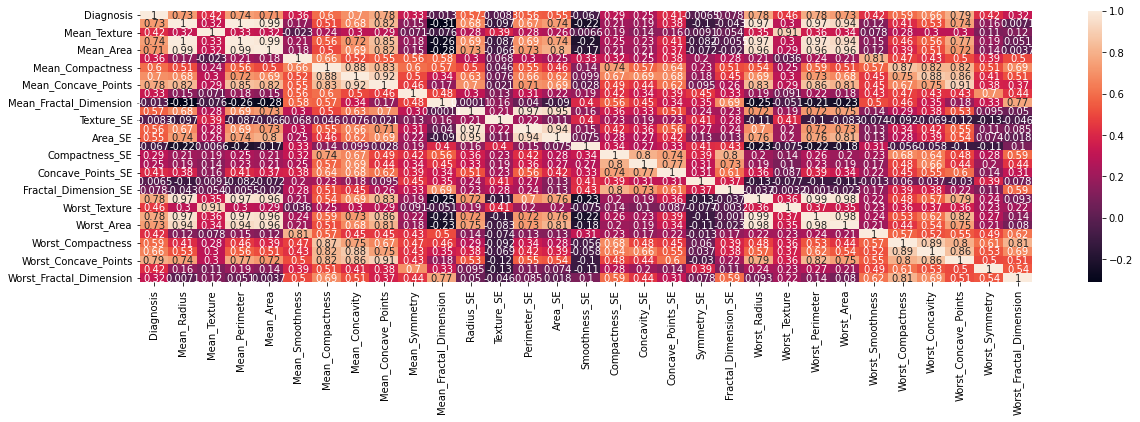

In [83]:
# correlation exploration with only index removed it computes the Pearson’s correlation coefficient.
indexremoved = list(wdbcwh.columns[1:32])
wholedata = wdbcwh[indexremoved]
#Replace the M/B string values with 1 and 0 to appear on the heat map for easier comparison
wholedata = wholedata.replace({'M':1,'B':0})
corr_wholematrix = wholedata.corr()
#The parameter ‘ annot=True ‘ displays the values of the correlation coefficient
#in each cell
sns.heatmap(corr_wholematrix, annot = True)
plt.rcParams["figure.figsize"] = (20,5)
plt.show()

In [84]:
#Further examination of our correlations with the aim to reduce features (feature selection)
ourcors = wholedata.corr()
#selecting the high correlation features both positive and negative
cor_target= abs(ourcors["Diagnosis"])
high_features = cor_target[cor_target>0.5]
high_features

Diagnosis               1.000000
Mean_Radius             0.730029
Mean_Perimeter          0.742636
Mean_Area               0.708984
Mean_Compactness        0.596534
Mean_Concavity          0.696360
Mean_Concave_Points     0.776614
Radius_SE               0.567134
Perimeter_SE            0.556141
Area_SE                 0.548236
Worst_Radius            0.776454
Worst_Perimeter         0.782914
Worst_Area              0.733825
Worst_Compactness       0.590998
Worst_Concavity         0.659610
Worst_Concave_Points    0.793566
Name: Diagnosis, dtype: float64

However we also know that several of these features are highly correlated with each other (circle calculations etc.) and so we can eliminate those as much as possible by chosing only one of those correlated with each other

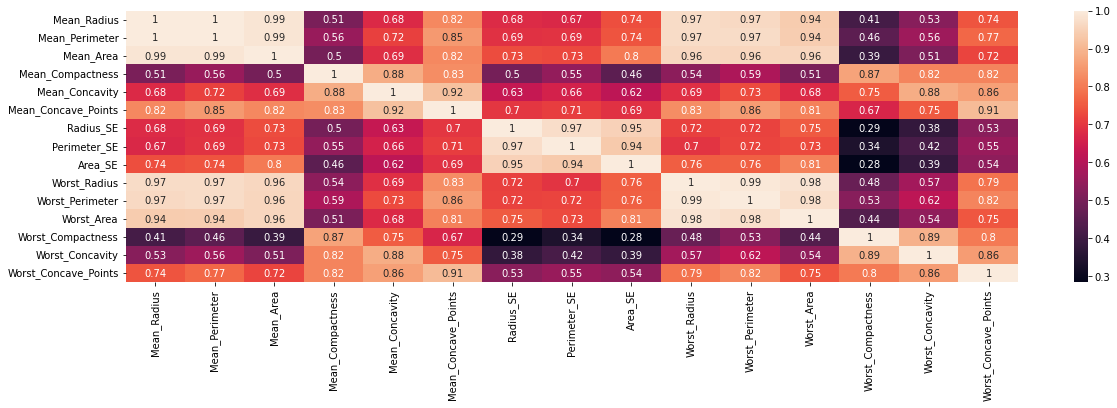

In [85]:
highfeaturescompare=wholedata[["Mean_Radius","Mean_Perimeter","Mean_Area","Mean_Compactness","Mean_Concavity","Mean_Concave_Points","Radius_SE","Perimeter_SE","Area_SE","Worst_Radius","Worst_Perimeter","Worst_Area","Worst_Compactness","Worst_Concavity","Worst_Concave_Points"]].corr()
#will use true this time as easier to read
sns.heatmap(highfeaturescompare, annot = True)
plt.rcParams["figure.figsize"] = (20,5)
plt.show()

So we can see that 
Mean_Radius, Mean_Perimeter, Mean_Area, Worst_Radius, Worst_Perimeter, Worst_Area are highly correlated so we chose the one mosted correlated with Diagnosis above so we chose Worst_Perimeter
Radius_SE, Perimeter_SE, Area_SE are highly correlated so we chose Radius_SE
Mean_Compactness, Mean_Concavity, Mean_Concave_Points, Worst_Compactness, Worst_Concavity, Worst_Concave_Points are highly correlated so we chose Worst_Concave_Points     


# Training the linear regression model

Here we are using linear regression to compare features in our model to see the correlation between them.  We are training this model to show us how dependent the variables are on one another.

### Reference
SKLearn documentation on Linear Regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

# Creating linear regression model for Area_SE and Diagnosis
Here I have trained a model to show us the positive correlation between two features in our dataset, we can clearly see from this model that the Area_SE has a positive impact on the Diagnosis.  When the Area_SE value increases then on average the probability of the Diagnosis value increases.

y test r^2 value:  1.0
mean_squared_error value:  0.2935421072834039
Coefficient:  [0.00640788]
Intercept:  0.10721415431353698
                  Chi-square test   results
0  Pearson Chi-square ( 377.0) =   393.6820
1                      p-value =     0.2666
2                   Cramer's V =     0.9946
predict  [1.09018287]


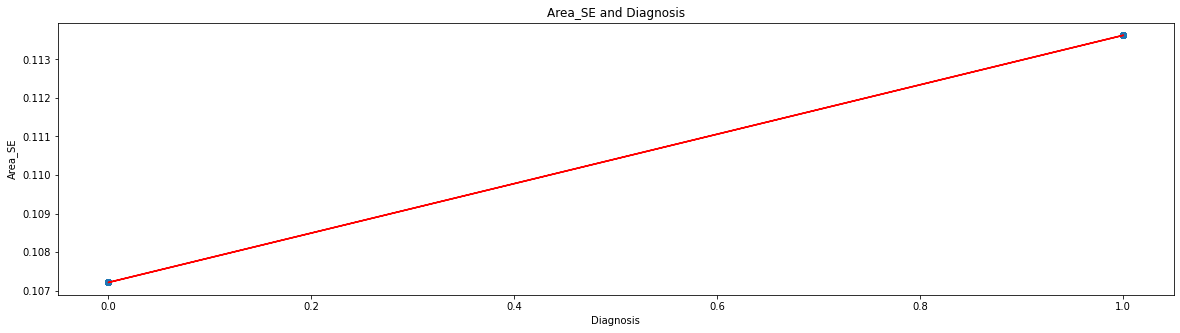

In [86]:
# Here we train a model to perform linear regression data set to predict the diagnosis



X_trainArray = np.array(X_train['Area_SE']).reshape(-1,1)
y_trainArray = np.array(y_train).reshape(-1,1)

# create the linear regression model by fitting training set to the test set
regression_model = LinearRegression().fit(X_trainArray,y_train)
# Score the model and retrive r^2 value
y_pred = regression_model.predict(y_trainArray)
rSquared = regression_model.score(y_trainArray, y_pred)
print('y test r^2 value: ', rSquared)
print('mean_squared_error value: ', mean_squared_error(y_trainArray, y_pred))
print('Coefficient: ',regression_model.coef_)
print('Intercept: ',regression_model.intercept_)

plt.xlabel("Diagnosis")
plt.ylabel("Area_SE")
plt.title('Area_SE and Diagnosis')
plt.scatter(y_trainArray,y_pred)
plt.plot(y_trainArray,y_pred,c='r')
crosstab,result = researchpy.crosstab(X_train['Area_SE'],y_train,test='chi-square')
print(result)

print('predict ',regression_model.predict([[153.4]]))


I will demonstrate with some predictions below that shows the values are positively skewed.  We will see that whenever we pass in a high Area_SE the probability of a positive diagnosis increases.  We can also see there is a low mean square error and a small positive coefficient.  Since our coefficient is positive we will see that positive values will produce higher values for our dependent variable where as higher values will produce low values for our dependent variable

In [87]:
# As we can see not too much of a difference between the values here
print('this value will be high: ', regression_model.predict([[0.5]]))
print('this value will be low: ', regression_model.predict([[0.1]]))

# just to make our example clearer let's use ridiculously inflated values  
print('let\'s make our model predict some grossly inflated / deflated values to show that these features do indeed have a negative impact on one another')
print('this value will be high: ', regression_model.predict([[100]]))
# I use a negative value here to demonstrate the probability of cancer will be far lower
print('this value will be low: ', regression_model.predict([[-100]]))


this value will be high:  [0.11041809]
this value will be low:  [0.10785494]
let's make our model predict some grossly inflated / deflated values to show that these features do indeed have a negative impact on one another
this value will be high:  [0.7480021]
this value will be low:  [-0.53357379]


As we can see above that whenever I make the value of the mean fractal dimension higher then the value of our dependent variable will decrease, whenever I make it lower it will increase.  We can also see that the values don't have too much of an effect on each other this is because the low value of the negative correlation

# Positive correlation
Here we compare the concave points severity with the concavity severity, we see that there is a positive linear correlation between the two variables, we also see that the R^2 value is one which indicates a possible overfitting of our model.  We can see clearly from this graph that the two variables have a high correlation and that if the value increases in one of the variables then we can predict that the other variable also increases

y test r^2 value:  1.0
mean_squared_error value:  2.1898829948121756
Coefficient:  [0.10291106]
Intercept:  -1.0886235286643462
predict  [1.01076208]


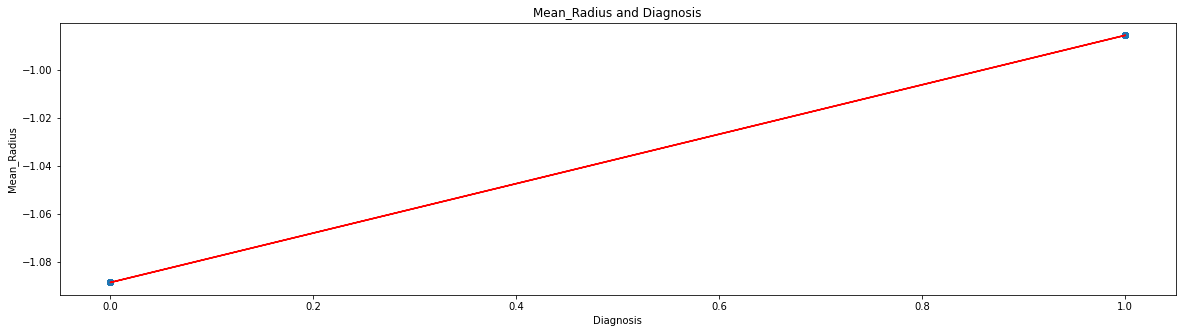

In [88]:
X_trainArray = np.array(X_train['Mean_Radius']).reshape(-1,1)
y_trainArray = np.array(y_train).reshape(-1,1)

# create the linear regression model by fitting training set to the test set
regression_model = LinearRegression().fit(X_trainArray,y_train)
# Score the model and retrive r^2 value
y_pred = regression_model.predict(y_trainArray)
rSquared = regression_model.score(y_trainArray, y_pred)
print('y test r^2 value: ', rSquared)
print('mean_squared_error value: ', mean_squared_error(y_trainArray, y_pred))
print('Coefficient: ',regression_model.coef_)
print('Intercept: ',regression_model.intercept_)

plt.xlabel("Diagnosis")
plt.ylabel("Mean_Radius")
plt.title('Mean_Radius and Diagnosis')
plt.scatter(y_trainArray,y_pred)
plt.plot(y_trainArray,y_pred,c='r')
print('predict ',regression_model.predict([[20.4]]))


We can see here there is a positive coefficient which is the amount we expect the value to increase by when making a prediction, we can also see that there is a low mean squared error value this indicates the performance of the model and the distance away the points are from our line

Below we see the second models features have on one another, we can clearly see that the data has a positive correlation from our graph but let's show some concrete examples and perform some predictions using it.

In [89]:
print('this value will be high: ', regression_model.predict([[150]]))
print('this value will be low: ', regression_model.predict([[0.1]]))

# just to show how high the impact will be with grossly inflated / deflated values values

print('let\'s make our model predict some grossly inflated / deflated values to show severity of impact')
print('this value will be high: ', regression_model.predict([[1000]]))
print('this value will be low: ', regression_model.predict([[0.0000000001]]))


this value will be high:  [14.34803537]
this value will be low:  [-1.07833242]
let's make our model predict some grossly inflated / deflated values to show severity of impact
this value will be high:  [101.82243579]
this value will be low:  [-1.08862353]


Since the above values are highly correlated we see a greater rise and decrease in the predicted values when predicting than we did in the first linear regression model.  This is due to the fact that these two variables have a positive correlation of 0.776207, the features we used in our first model have a lower negative correlation which is why we don't see as much of an impact on them.  If they had a negative correlation of 0.776207 we would see the same rise and decrease in the first linear regression models predicted valules as well

# Examples of low and high correlation in our dataset

Additionally we can see here the Mean Perimeter has a positive correlation with our Mean Radius feature.  Below this image we can see an example of low negative correlation, these variables don't really impact each other much

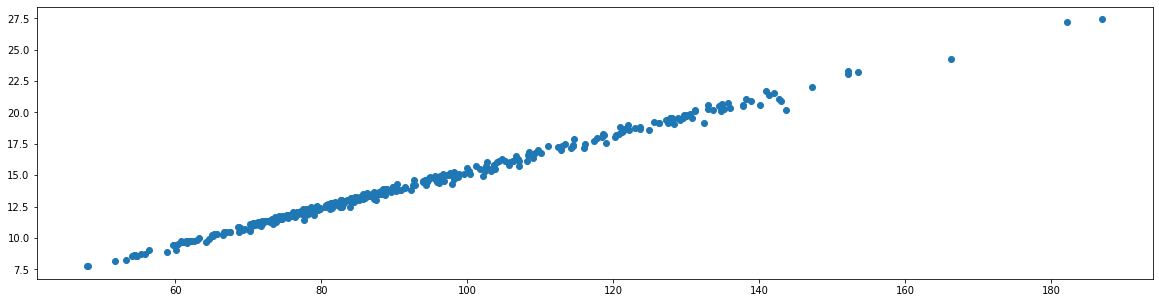

In [90]:
# Example of positive Linear correlation between radius and perimeter
# since these correlate highly we can remove one of them from set

plt.scatter(X_train['Mean_Perimeter'],X_train['Mean_Radius'])


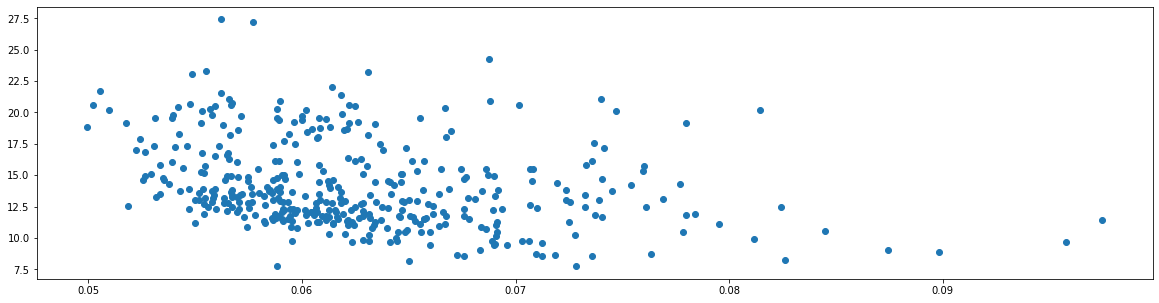

In [91]:
# example of low negative correlation
plt.scatter(X_train['Mean_Fractal_Dimension'],X_train['Mean_Radius'])


In [92]:
#This method will be used to show a segment of the predicted values
def predictValues(realValues,predictedValues):
  correct = 0;
  count = 0;
  actualValues = np.array(realValues).reshape(-1,1)
  for i in realValues:
    if count < 10:
      print('Actual: ', realValues[count], ' Predicted: ', predictedValues[count])
    if predictedValues[count] == realValues[count]:
      correct+=1
    count+=1
  print('Total values: ',count, ' correctly predicted values: ',correct)
  print('Total Percentage Correct: ', (correct / count) * 100, ' %')


# K Means

Here we use kmeans to predict the diagnosis values in our test set from our training set as you can see it performs adequately predicting 146 out of 171 values correctly which is approximately 85% of our dataset

In [93]:
y_testArray = np.array(y_test).reshape(-1,1)
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)
predictValues(y_testArray,kmeans.predict(X_test))
print('Silhouette Score: ', silhouette_score(X_train,kmeans.labels_))


Actual:  [0]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [0]  Predicted:  1
Total values:  171  correctly predicted values:  29
Total Percentage Correct:  16.95906432748538  %
Silhouette Score:  0.6990554628802439


# KNN Predictions

Here we are using KNN to make predictions based on a number of features fed into the model.  As we can see it's score is 0.96 which isn't perfect but it's better to avoid overfitting the model so that it can adapt to new data. This algorithm works by clustering data with similar features and classifying them.

### references

SKLearn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [94]:
# K Nearest Neighbour

knn = KNeighborsClassifier(n_neighbors=55)
knn.fit(X_train,y_train)
print('Performance of model: ',knn.score(X_test,y_test))
# adding knn.score to results list
resultdatatable.append(['K Neighbour:', round(knn.score(X_test,y_test),2) ])

Performance of model:  0.8947368421052632


In [95]:
# Make prediction on testSet
predictValues(y_testArray,knn.predict(X_test))

Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Total values:  171  correctly predicted values:  153
Total Percentage Correct:  89.47368421052632  %


# Naive Bayes prediction of diagnosis

Here we use naive bayes on both sets to perform  the diagnosis based on features from the dataset, I chose to input a large number of features into this model as generally this algorithm performs better when fitted with more features, in Naive Bayes the weights of the features have no bearing on the output.  The model below appears to be overfitted

## References

Sklearn documentation: https://scikit-learn.org/stable/modules/naive_bayes.html

You may also notice we are using a particular kind of Naive Bayes called Gaussian Naive Bayes for this model.  We chose to include this version of Naive Bayes due to it's ability to handle continuous data. The algorithm also has the advantage of speed and is frequently used in email spam classifiers.  The algorithm works by assuming that the continuous values across the features are normally distributed in a Gaussian fashion(think of a bell curve!)

## What happens when we don't scale the data

Demonstrating the zero frequency phenomenon, we can see below that when we train the model using our train sets we experience a phenomenon known as zero frequency.  This occurs when the model takes all probabilities of our features and performs calculations which result in a total score of zero or when one value has a much higher probability with another.  Here we induced zero frequency which occurred due to our relatively small dataset.

### Notice in our first model the malignant value is appearing for all  predictions, and in our second model 0 is being predicted for all the test set values.  Also notice our probability where one value is much higher than the other.

In [96]:
yTestArray = np.array(y_test).reshape(-1,1)
y_trainArray = np.array(y_train).reshape(-1,1)
probability = np.array(y_test.iloc[0:2]).reshape(-1,1)

# here we smooth the data to improve accuracy
naive_bayes = GaussianNB(priors=None)
naive_bayes.fit(X_train,y_train)
print('Probability of diagnosis values occurring: ', naive_bayes.predict_proba(X_train))

y_train_pred = naive_bayes.predict(X_train)
print('Score of model on training set: ', naive_bayes.score(X_train,y_train))
y_pred = naive_bayes.predict(X_test)
print('Probability of diagnosis values occurring: ', naive_bayes.predict_proba(X_train))
print('Score of model on test sets: ', naive_bayes.score(X_test,y_test))



Probability of diagnosis values occurring:  [[2.40698335e-107 1.00000000e+000]
 [9.99999875e-001 1.24978753e-007]
 [1.00000000e+000 1.11857035e-016]
 [2.70137934e-025 1.00000000e+000]
 [1.00000000e+000 6.33468381e-011]
 [1.00000000e+000 9.43657962e-015]
 [1.00000000e+000 1.16626962e-016]
 [1.00000000e+000 3.27531301e-016]
 [3.12950619e-077 1.00000000e+000]
 [1.00000000e+000 1.76224030e-016]
 [9.99999990e-001 1.03053050e-008]
 [2.59648953e-190 1.00000000e+000]
 [9.99856576e-001 1.43423703e-004]
 [9.99999998e-001 2.37243842e-009]
 [9.97494640e-001 2.50535988e-003]
 [1.00000000e+000 1.78779561e-013]
 [9.96919800e-001 3.08019957e-003]
 [7.84172036e-031 1.00000000e+000]
 [3.12425673e-044 1.00000000e+000]
 [1.00000000e+000 1.37745289e-015]
 [2.40467748e-083 1.00000000e+000]
 [9.99999991e-001 9.30521916e-009]
 [8.74331425e-133 1.00000000e+000]
 [5.27116442e-116 1.00000000e+000]
 [9.99995282e-001 4.71773116e-006]
 [3.32799981e-037 1.00000000e+000]
 [9.54065921e-001 4.59340786e-002]
 [5.5007863

In [97]:
predictValues(yTestArray,y_pred)
predictValues(y_trainArray,y_train_pred)


Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Total values:  171  correctly predicted values:  156
Total Percentage Correct:  91.22807017543859  %
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Total values:  398  correctly predicted values:  375
Total Percentage Correct:  94.22110552763819  %


In [98]:
naive_bayes = GaussianNB(priors=None, var_smoothing=0)
naive_bayes.fit(X_train,y_train)
print('Probability of diagnosis values occurring: ', naive_bayes.predict_proba(X_train))

y_train_pred = naive_bayes.predict(X_train)
print('Score of model on training set: ', naive_bayes.score(X_train,y_train))
y_pred = naive_bayes.predict(X_test)
print('Probability of diagnosis values occurring: ', naive_bayes.predict_proba(X_train))
print('Score of model on test sets: ', naive_bayes.score(X_test,y_test))


Probability of diagnosis values occurring:  [[7.09859364e-111 1.00000000e+000]
 [9.99999997e-001 2.86129633e-009]
 [1.00000000e+000 4.46482493e-019]
 [1.92312296e-034 1.00000000e+000]
 [1.00000000e+000 6.14723512e-013]
 [1.00000000e+000 1.25988991e-015]
 [1.00000000e+000 5.22993343e-018]
 [1.00000000e+000 1.49192625e-017]
 [3.24200822e-082 1.00000000e+000]
 [1.00000000e+000 1.63052530e-018]
 [9.99999999e-001 1.07205371e-009]
 [1.40745925e-197 1.00000000e+000]
 [9.99949627e-001 5.03727992e-005]
 [9.99999999e-001 1.09583431e-009]
 [9.99778165e-001 2.21834817e-004]
 [1.00000000e+000 4.63957632e-014]
 [9.97554942e-001 2.44505767e-003]
 [2.56555331e-033 1.00000000e+000]
 [1.74577315e-045 1.00000000e+000]
 [1.00000000e+000 1.09262504e-017]
 [7.18921764e-097 1.00000000e+000]
 [1.00000000e+000 1.95844516e-010]
 [3.73668702e-163 1.00000000e+000]
 [2.95958713e-133 1.00000000e+000]
 [9.99991595e-001 8.40531158e-006]
 [5.57440169e-044 1.00000000e+000]
 [9.86660316e-001 1.33396840e-002]
 [2.7570492

In [99]:
predictValues(y_trainArray,y_train_pred)
predictValues(yTestArray,y_pred) 

Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Total values:  398  correctly predicted values:  371
Total Percentage Correct:  93.21608040201005  %
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Total values:  171  correctly predicted values:  154
Total Percentage Correct:  90.05847953216374  %


# Alternative Naive Bayes Model

Below we scaled the data and evened out the probability of each of our values occurring, notice we receive far more accurate results

In [100]:
# scaling the features to reduce unwanted influence 
sc = StandardScaler()  
X_train_scaled = sc.fit_transform(X_train)  
X_test_scaled = sc.fit_transform(X_test) 

# reshaping y_test to fit with naive_bayes predict output for comparison
yTestReshaped = np.array(y_test).reshape(-1,1)

naive_bayes = GaussianNB(priors=None)
#training the model 
naive_bayes.fit(X_train_scaled,y_train)
#using X_test data in the trained model to predict y
y_pred=naive_bayes.predict(X_test_scaled)

print('Score of model on test sets: ', naive_bayes.score(X_test_scaled,y_test))
print('Accuracy Score of results: ',accuracy_score(y_test, y_pred)) #using as a double check on accuracy
# adding the accuracy result to the table
resultdatatable.append(['Navie Bayes:', round(accuracy_score(y_test, y_pred),2) ])
# printing the probability
print('Probability of diagnosis values occurring: ',naive_bayes.predict_proba(X_test_scaled))
# The actual and predicted side by side and totaled comparison
print(predictValues(yTestReshaped,y_pred))

Score of model on test sets:  0.9122807017543859
Accuracy Score of results:  0.9122807017543859
Probability of diagnosis values occurring:  [[1.00000000e+000 2.18749710e-016]
 [1.00000000e+000 3.47245664e-016]
 [1.00000000e+000 1.60312608e-014]
 [1.00000000e+000 1.46799272e-021]
 [4.98413712e-044 1.00000000e+000]
 [1.00000000e+000 1.02936788e-014]
 [5.36332667e-016 1.00000000e+000]
 [1.00000000e+000 1.45367353e-015]
 [1.00000000e+000 3.30310338e-015]
 [1.00000000e+000 4.98518592e-013]
 [8.70728126e-049 1.00000000e+000]
 [5.79075059e-025 1.00000000e+000]
 [6.70889680e-029 1.00000000e+000]
 [1.67812136e-035 1.00000000e+000]
 [1.00000000e+000 1.16386456e-016]
 [1.00000000e+000 6.77750645e-019]
 [7.09134351e-012 1.00000000e+000]
 [1.00000000e+000 5.68540166e-022]
 [1.84638695e-024 1.00000000e+000]
 [8.74533858e-043 1.00000000e+000]
 [2.82711977e-020 1.00000000e+000]
 [1.00000000e+000 1.98712309e-015]
 [4.06167341e-155 1.00000000e+000]
 [9.99978718e-001 2.12815151e-005]
 [1.00000000e+000 2.

In [101]:
#Confusion Matrix for alternative Naive Bayes  

from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(yTestReshaped, y_pred)  

print(cm)  

[[98  6]
 [ 9 58]]


# Decision Trees

In [102]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


Training the first default tree model

In [103]:
clf = tree.DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)



In [104]:
print(y_test.shape,y_train.shape,X_train.shape,X_test.shape)

(171,) (398,) (398, 30) (171, 30)


Here we display the tree

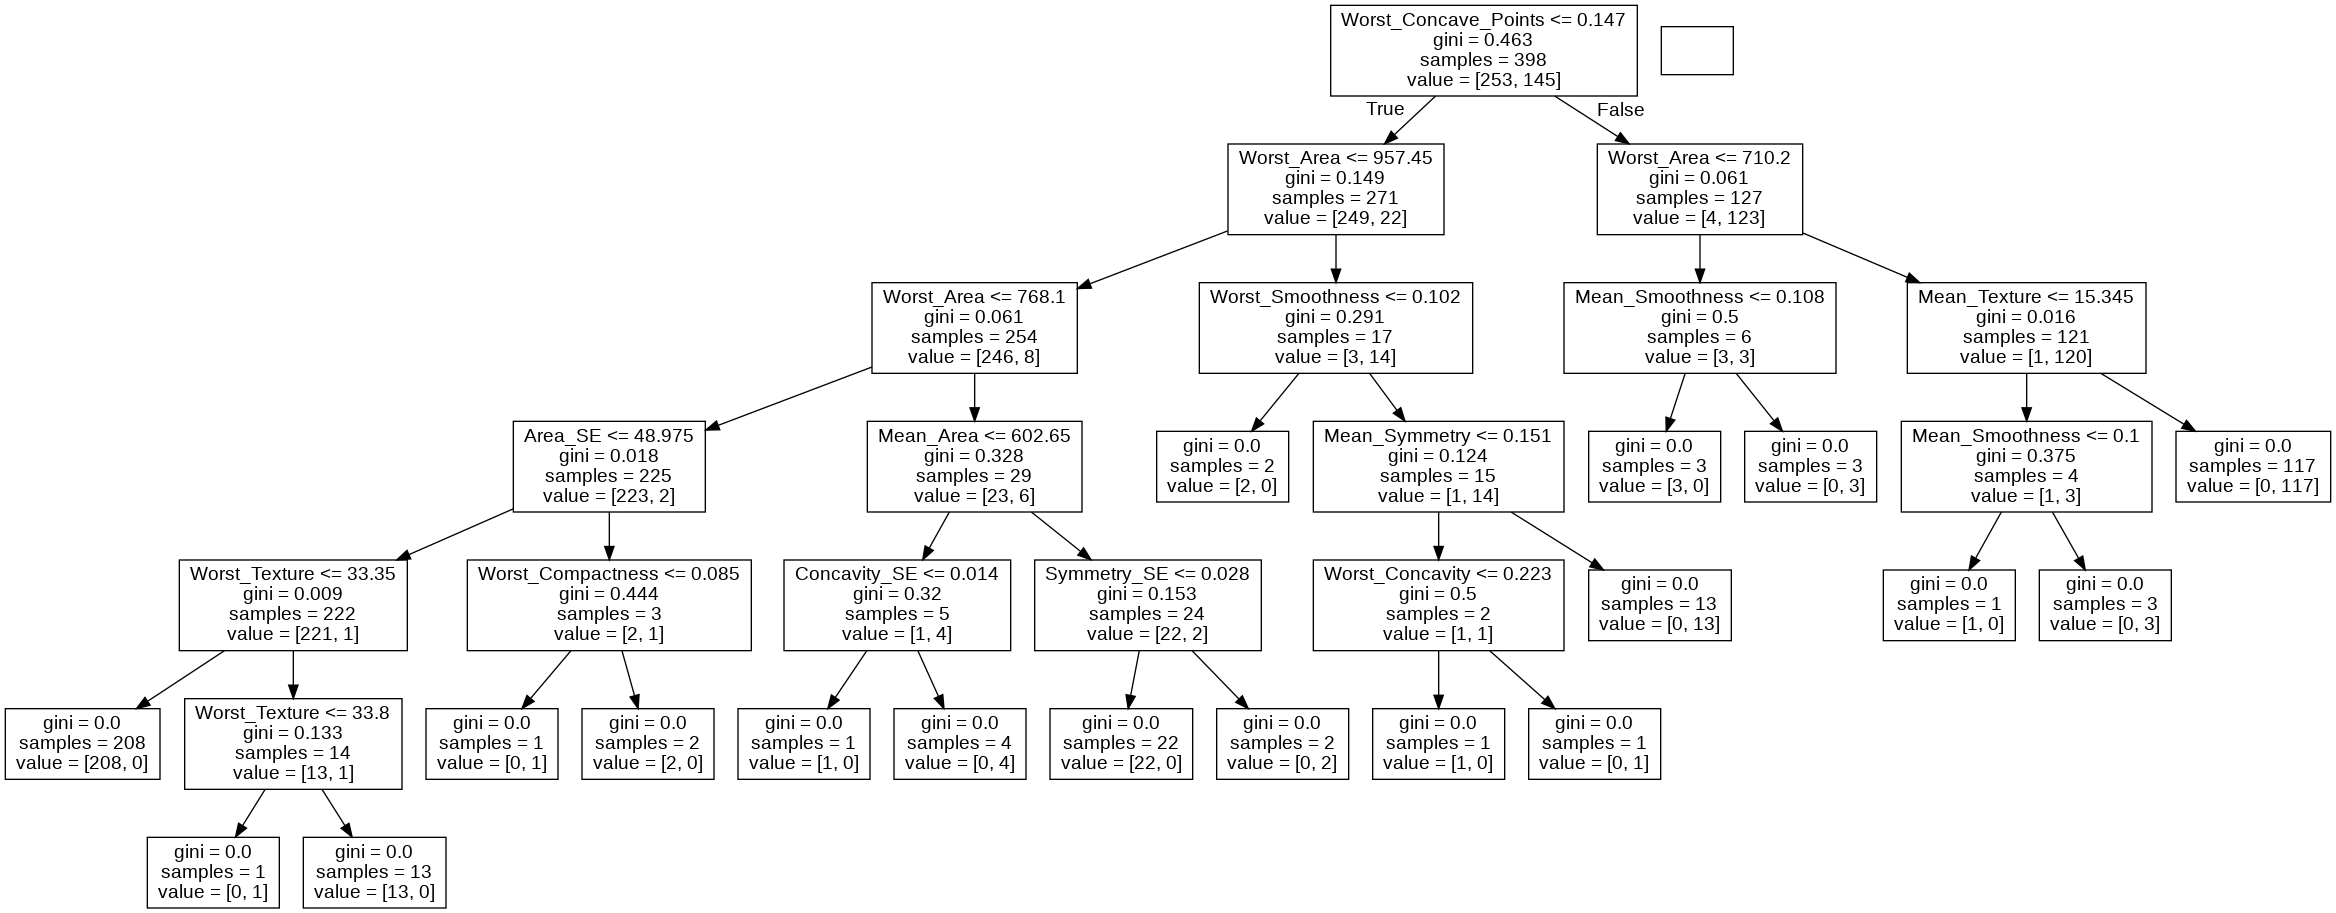

In [105]:
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, feature_names=features)
graph, = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

The predicticton result for test data, this should really be fresh data not reusing training data



In [106]:
#When we use our training data above we should use our validation data here to test the predictions and have a further test set 
# however we only have train and test data so using Test set
print("Making predictions for the following test patients:")
print(X_test)
print("The predictions are")
print(clf.predict(X_test))

Making predictions for the following test patients:
     Mean_Radius  Mean_Texture  ...  Worst_Symmetry  Worst_Fractal_Dimension
439       14.020         15.66  ...          0.2136                  0.06710
358        8.878         15.49  ...          0.2434                  0.07431
483       13.700         17.64  ...          0.2518                  0.06960
144       10.750         14.97  ...          0.2300                  0.06769
562       15.220         30.62  ...          0.4089                  0.14090
..           ...           ...  ...             ...                      ...
383       12.390         17.48  ...          0.2819                  0.11180
67        11.310         19.04  ...          0.2400                  0.06641
476       14.200         20.53  ...          0.2534                  0.07858
470        9.667         18.49  ...          0.3174                  0.08524
365       20.440         21.78  ...          0.2609                  0.06735

[171 rows x 30 columns]

Desicion tree test results



In [107]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)
print(y_pred)
# Test decision tree accuracy
# Model Accuracy, how often is the classifier correct?
resultdatatable.append(['Standard trained gini decision tree:', round(metrics.accuracy_score(y_test, y_pred),2) ])
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1
 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1
 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1]
Accuracy: 0.9415204678362573


Random forest

In [108]:
rfclf = RandomForestClassifier(n_estimators=10)
rfclf = rfclf.fit(X_train,y_train)
#Predict result from the data given
y_pred=rfclf.predict(X_test)
print(y_pred)

#Test Random forest accuracy
# Model Accuracy, how often is the classifier correct?
resultdatatable.append(['Standard trained gini random forest:', round(metrics.accuracy_score(y_test, y_pred),2) ])
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1
 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0
 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1
 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1]
Accuracy: 0.9473684210526315


So we can see that the Random forest is more accurate

We also explored the alternative to the decision tree using entropy criterion rather than the default gini



In [109]:

entclf = tree.DecisionTreeClassifier(criterion="entropy")

# Train Decision Tree Classifer
entclf = entclf.fit(X_train,y_train)

Display the entropy tree



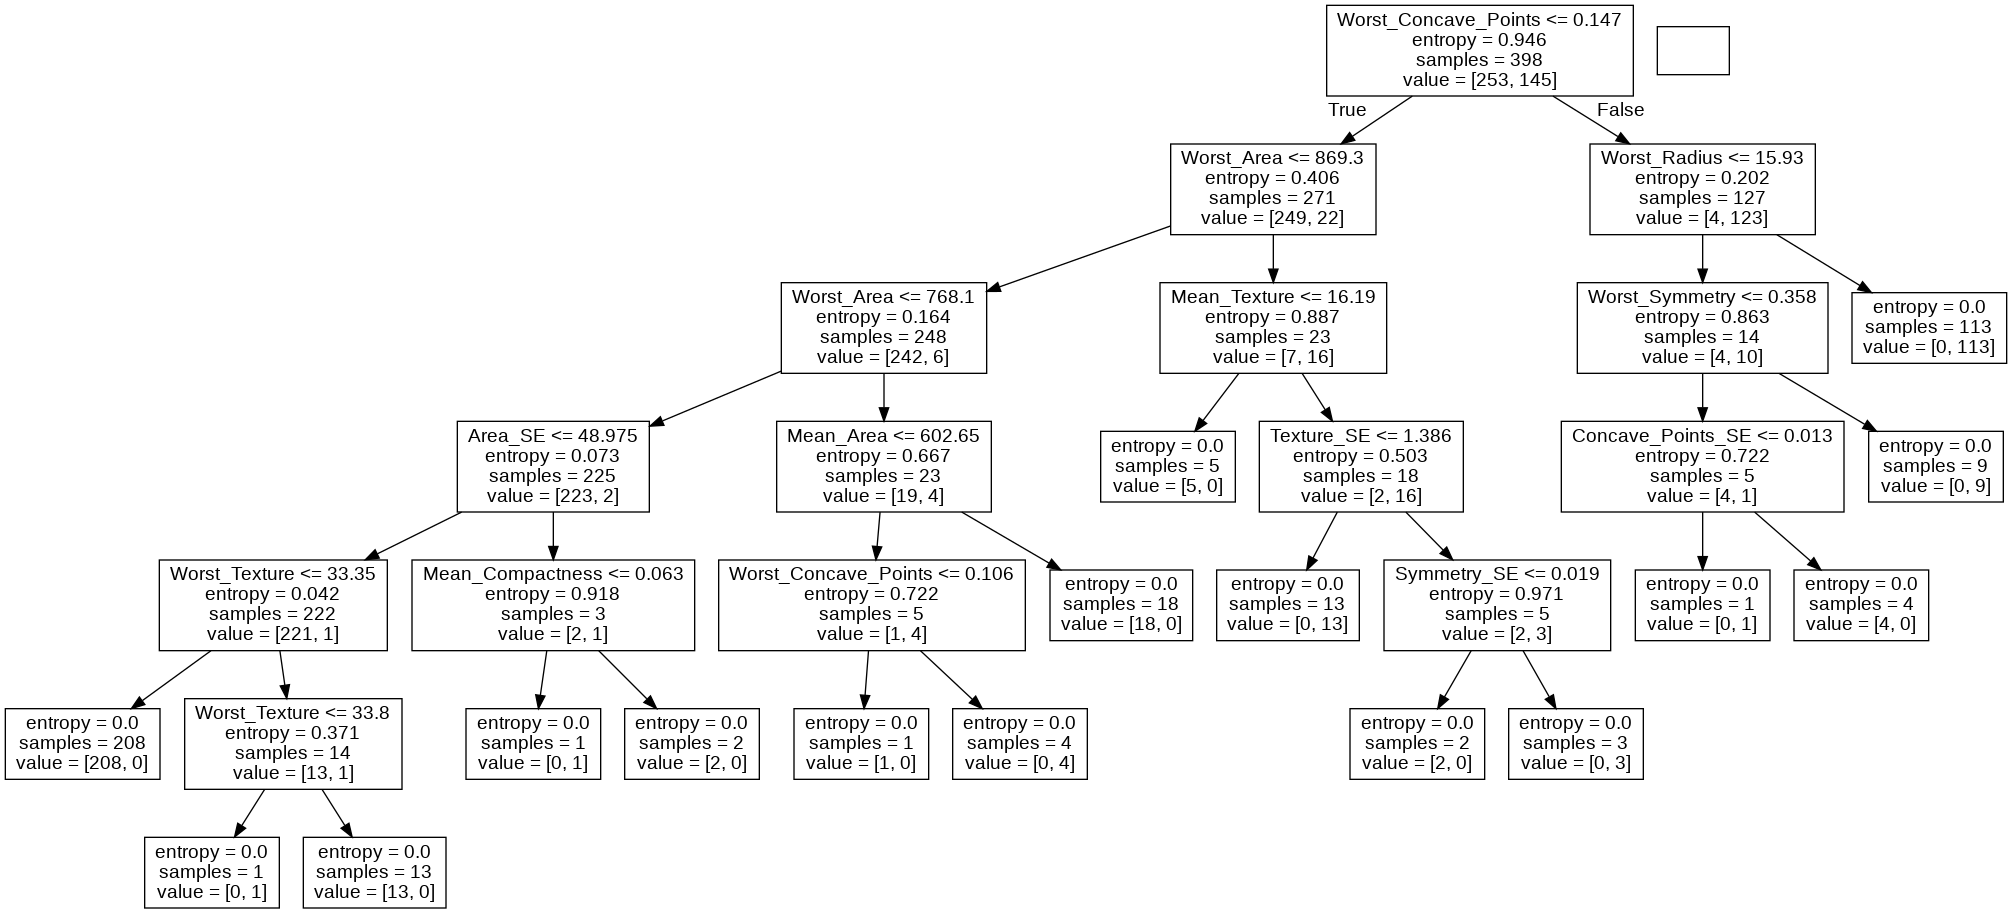

In [110]:
dot_data = StringIO()
tree.export_graphviz(entclf, out_file=dot_data, feature_names=features)
graph, = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

entropy tree results

In [111]:

#Predict the response for test dataset
y_pred = entclf.predict(X_test)
print(y_pred)
# Test decision tree accuracy
# Model Accuracy, how often is the classifier correct?
resultdatatable.append(['Standard trained entropy decision tree:', round(metrics.accuracy_score(y_test, y_pred),2) ])
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1
 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0
 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1
 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1]
Accuracy: 0.935672514619883


Random Entropy forest

In [112]:

rfentclf = RandomForestClassifier(criterion="entropy",n_estimators=10)
rfentclf = rfentclf.fit(X_train,y_train)
#Predict result from the data given
y_pred=rfentclf.predict(X_test)
print(y_pred)

#Test Random forrrest accuracy
# Model Accuracy, how often is the classifier correct?
resultdatatable.append(['Standard trained entropy random forest:', round(metrics.accuracy_score(y_test, y_pred),2) ])
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1
 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 0
 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1
 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1]
Accuracy: 0.9473684210526315


 the tree and forest models explored via Cross-validation



In [113]:
np.random.seed(1)
print('X_test set shape: ',X.shape)
print('y_test set shape: ',y.shape)
# trees and forests used above but without the train/test split these will be applied using the cross validation to see the accuracy of the models 
cvclf = tree.DecisionTreeClassifier()
cvrfclf = RandomForestClassifier(n_estimators=10)
cventclf = tree.DecisionTreeClassifier(criterion="entropy")
cvrfentclf = RandomForestClassifier(criterion="entropy",n_estimators=10)

scores = cross_val_score(cvclf, X, y)
print('gini tree accuracy = {} +/- {}'\
        .format(scores.mean(axis=0), scores.std(axis=0)))
# adding to results table
resultdatatable.append(['cross validation gini decision tree:', round(scores.mean(axis=0),2) ])
cvResults=cross_validate(cvclf, X, y)
print('Test scores for gini tree:',cvResults['test_score'])

scores = cross_val_score(cvrfclf, X, y)
print('gini random forest accuracy = {} +/- {}'\
        .format(scores.mean(axis=0), scores.std(axis=0)))
# adding to results table
resultdatatable.append(['cross validation gini random forest:', round(scores.mean(axis=0),2) ])
cvResults=cross_validate(cvrfclf, X, y)
print('Test scores for gini random forest:',cvResults['test_score'])

scores = cross_val_score(cventclf, X, y)
print('entropy accuracy = {} +/- {}'\
        .format(scores.mean(axis=0), scores.std(axis=0)))
# adding to results table
resultdatatable.append(['cross validation entropy decision tree:', round(scores.mean(axis=0),2) ])
cvResults=cross_validate(cventclf, X, y)
print('Test scores for entropy tree:',cvResults['test_score'])

scores = cross_val_score(cvrfentclf, X, y)
print('entropy random forest accuracy = {} +/- {}'\
        .format(scores.mean(axis=0), scores.std(axis=0)))
# adding to results table
resultdatatable.append(['cross validation entropy random forest:', round(scores.mean(axis=0),2) ])
cvResults=cross_validate(cvrfentclf, X, y)
print('Test scores for entropy forest:',cvResults['test_score'])


X_test set shape:  (569, 30)
y_test set shape:  (569,)
gini tree accuracy = 0.9121099208197485 +/- 0.011235106844788624
Test scores for gini tree: [0.9122807  0.9122807  0.92105263 0.92105263 0.90265487]
gini random forest accuracy = 0.9613724576929048 +/- 0.013078882567012277
Test scores for gini random forest: [0.97368421 0.92105263 0.97368421 0.95614035 0.97345133]
entropy accuracy = 0.924437199192672 +/- 0.015253603562759774
Test scores for entropy tree: [0.92982456 0.90350877 0.94736842 0.95614035 0.94690265]
entropy random forest accuracy = 0.9507995652848937 +/- 0.01967278843804794
Test scores for entropy forest: [0.93859649 0.93859649 0.97368421 0.95614035 0.96460177]


Principal Component Analysis(PCA) exploring the difference of using reduced dimensions.  

In [114]:
# Standardise the data
x = wdbcwh[features]
x = StandardScaler().fit_transform(x)
#Explain the results
print(np.mean(x))
print(np.std(x))
#PCA we found that 7 components retained over 90% of the data
pca = PCA(n_components=7, whiten=True).fit(x)
X_pca = pca.transform(x)
print(pca.components_)
print("Information retained by each component:",pca.explained_variance_ratio_)
print("Retained information total:",sum(pca.explained_variance_ratio_))

1.2487570048507913e-18
1.0
[[ 2.18902444e-01  1.03724578e-01  2.27537293e-01  2.20994985e-01
   1.42589694e-01  2.39285354e-01  2.58400481e-01  2.60853758e-01
   1.38166959e-01  6.43633464e-02  2.05978776e-01  1.74280281e-02
   2.11325916e-01  2.02869635e-01  1.45314521e-02  1.70393451e-01
   1.53589790e-01  1.83417397e-01  4.24984216e-02  1.02568322e-01
   2.27996634e-01  1.04469325e-01  2.36639681e-01  2.24870533e-01
   1.27952561e-01  2.10095880e-01  2.28767533e-01  2.50885971e-01
   1.22904556e-01  1.31783943e-01]
 [-2.33857132e-01 -5.97060883e-02 -2.15181361e-01 -2.31076711e-01
   1.86113023e-01  1.51891610e-01  6.01653628e-02 -3.47675005e-02
   1.90348770e-01  3.66575471e-01 -1.05552152e-01  8.99796818e-02
  -8.94572342e-02 -1.52292628e-01  2.04430453e-01  2.32715896e-01
   1.97207283e-01  1.30321560e-01  1.83848000e-01  2.80092027e-01
  -2.19866379e-01 -4.54672983e-02 -1.99878428e-01 -2.19351858e-01
   1.72304352e-01  1.43593173e-01  9.79641143e-02 -8.25723507e-03
   1.41883349e

Applying the PCA to the gini decision tree and random forest

In [115]:
X_pcatrain, X_pcatest, y_pcatrain, y_pcatest = train_test_split(X_pca, y, test_size=0.3)

pcaclf = tree.DecisionTreeClassifier()

# Train Decision Tree Classifer
pcaclf = pcaclf.fit(X_pcatrain,y_pcatrain)

#Predict the response for test dataset
y_pcapred = pcaclf.predict(X_pcatest)
print(y_pcapred)

# Test decision tree accuracy
print("PCA Gini Tree Accuracy:",metrics.accuracy_score(y_pcatest, y_pcapred))
# adding to results table
resultdatatable.append(['PCA Gini Tree:', round(metrics.accuracy_score(y_pcatest, y_pcapred),2) ])
pcarfclf = RandomForestClassifier(n_estimators=10)
pcarfclf = pcarfclf.fit(X_pcatrain,y_pcatrain)
#Predict result from the data given
y_pcarfpred=pcarfclf.predict(X_pcatest)
print(y_pcarfpred)

#Test Random forest accuracy
print("PCA Gini Random Forest:",metrics.accuracy_score(y_pcatest, y_pcarfpred))
# adding to results table
resultdatatable.append(['PCA Gini Random Forest:', round(metrics.accuracy_score(y_pcatest, y_pcarfpred),2) ])


[0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1
 1 1 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1
 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0
 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0]
PCA Gini Tree Accuracy: 0.9415204678362573
[0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1
 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 1 1 0 1
 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0
 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0
 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0]
PCA Gini Random Forest: 0.9766081871345029


As we can see the results are still highly accurate and if the data set was larger this reduction in features/columns would become more obvious for speed. However that would have to be offset against the possibility of misdiagnosis

In [116]:
# conlcusion results accuracy tuple list sorted in decending order by the second column which we'll call Accuracy
resultdatatable.sort(key=lambda x:x[1], reverse=True)
print(tabulate(resultdatatable, headers=['Method Description','Accuracy'],tablefmt="latex"))


\begin{tabular}{lr}
\hline
 Method Description                      &   Accuracy \\
\hline
 PCA Gini Random Forest:                 &       0.98 \\
 cross validation gini random forest:    &       0.96 \\
 Standard trained gini random forest:    &       0.95 \\
 Standard trained entropy random forest: &       0.95 \\
 cross validation entropy random forest: &       0.95 \\
 Standard trained gini decision tree:    &       0.94 \\
 Standard trained entropy decision tree: &       0.94 \\
 PCA Gini Tree:                          &       0.94 \\
 cross validation entropy decision tree: &       0.92 \\
 Navie Bayes:                            &       0.91 \\
 cross validation gini decision tree:    &       0.91 \\
 K Neighbour:                            &       0.89 \\
\hline
\end{tabular}
